<a href="https://colab.research.google.com/github/HarshalGoyal/TSF_Tasks/blob/main/Unsupervised_ML(Predicting_Optimal_Number_of_Clusters).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Task 2

Author : Harshal Goyal

Date : 5th July 2021

#Importing Necessary Modules and Dataset

In [24]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.cluster import KMeans

#Loading The Iris Dataset

In [25]:
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)

#Visualising the dataset

In [26]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


#Checking for any possible Empty Columns

In [27]:
iris_df.isna().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

#Assigning The features/parameters to variable x

In [28]:
x = iris_df.values

#Finding The optimal cluster value using Elbow method

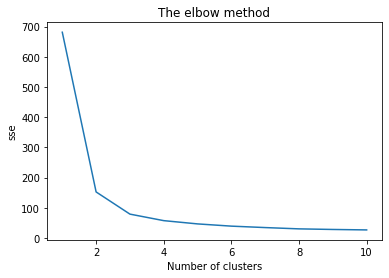

In [29]:
sse = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    sse.append(kmeans.inertia_)
    
# Plotting the results onto a line graph, 
# allowing us to observe the number for which error is minimum
plt.plot(range(1, 11), sse)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('sse') # Within cluster sum of squares
plt.show()

#Training the Model and collecting Predictions.

In [30]:

kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

#Plotting the obtained cluster perdictions on a scatter plot for Visualisation.

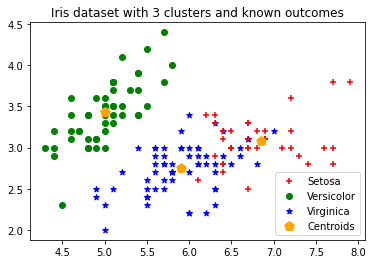

In [31]:
for i in range(0, len(x)):
    if y_kmeans[i] == 0:
        c1 = plt.scatter(x[i,0],x[i,1],c='r',
                marker='+')
    elif y_kmeans[i] == 1:
        c2 = plt.scatter(x[i,0],x[i,1],c='g',
                        marker='o')
    elif y_kmeans[i] == 2:
        c3 = plt.scatter(x[i,0],x[i,1],c='b',
                            marker='*')
c4 = plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'orange', marker= 'p')
plt.legend([c1, c2, c3,c4], ['Setosa', 'Versicolor',
    'Virginica','Centroids'])

plt.title('Iris dataset with 3 clusters and known outcomes')
plt.show()